# Setup

## Import modules

In [7]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import global variables and plotting functions

In [8]:
sys.path.insert(0, '..')

# global vars
from util_scripts.plotting_fcts_and_vars import years, growth_boroughs, boroughs, west_boroughs, columns, types

# plotting per borrough
from util_scripts.plotting_fcts_and_vars import plot_boroughs, plot_all_boroughs, plot_all_boroughs_earlier, plot_boroughs_earlier

# plotting stations data
from util_scripts.plotting_fcts_and_vars import plot_stations, plot_stations_changes

# plotting global vars
from util_scripts.plotting_fcts_and_vars import FIGSIZE, YEAR_XLABEL, PLOTS_DIR, GROWTH_MULTIPLIER, POINT_CHANGE

sys.path.insert(0, './notebooks')

# Number of pubs by borough

In [9]:
# load
pubs_units = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Pubs units", skiprows=4, names=columns)

# remove missing values
pubs_units.dropna(inplace=True)
pubs_units.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,4835.0,4875.0,4530.0,4455.0,4445.0,4335.0,4295.0,4210.0,4025.0,3890.0,3770.0,3770.0,3665.0,3615.0,3675.0,3615.0,3530.0
1,E09000001,City of London,200.0,195.0,180.0,180.0,200.0,185.0,200.0,195.0,185.0,190.0,175.0,165.0,155.0,160.0,150.0,150.0,160.0
2,E09000002,Barking and Dagenham,45.0,40.0,45.0,40.0,40.0,40.0,30.0,30.0,25.0,25.0,25.0,30.0,20.0,20.0,25.0,20.0,20.0
3,E09000003,Barnet,135.0,135.0,130.0,120.0,125.0,120.0,115.0,120.0,110.0,95.0,95.0,95.0,85.0,90.0,95.0,100.0,80.0
4,E09000004,Bexley,95.0,95.0,95.0,100.0,105.0,105.0,105.0,105.0,90.0,95.0,95.0,95.0,95.0,85.0,90.0,90.0,95.0


## Absolute value of growth boroughs

In [10]:
pubs_units_boroughs = pubs_units[pubs_units['Area name'].isin(growth_boroughs)]
pubs_units_boroughs.head()
hackney_pubs_units = pubs_units_boroughs[pubs_units_boroughs['Area name'] == 'Hackney']
hackney_pubs_units.head()


,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
12,E09000012,Hackney,155.0,155.0,135.0,135.0,135.0,130.0,125.0,130.0,125.0,120.0,125.0,135.0,145.0,150.0,155.0,160.0,175.0


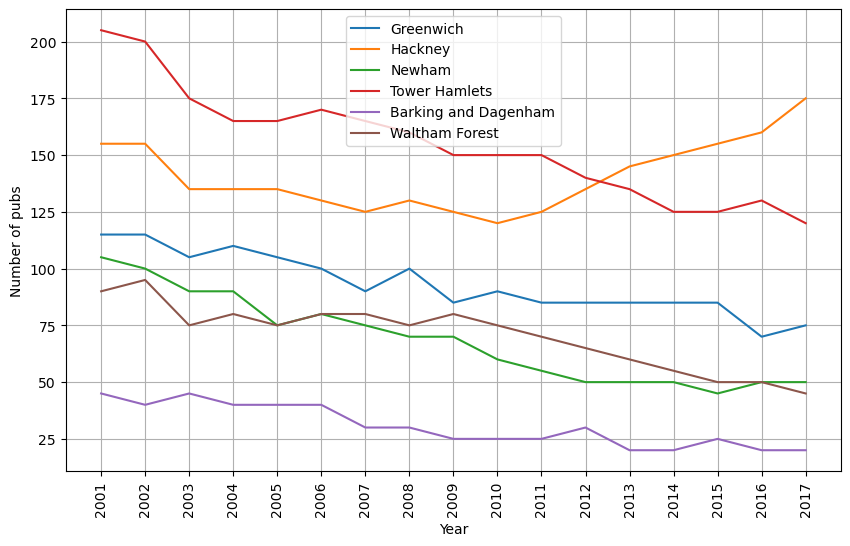

In [11]:
plot_boroughs(pubs_units_boroughs)
plt.ylabel('Number of pubs')

plt.savefig(f'{PLOTS_DIR}/pubs_units_values.png', bbox_inches='tight')
plt.show()

**Observations:**

## Changes (baseline 2005) 

In [12]:
multipliers_2005 = pubs_units[years].div(pubs_units["2005"], axis=0)
multipliers_2005 = pd.concat([pubs_units.iloc[:, :2], multipliers_2005], axis=1)
multipliers_2005.head()
hackney_multipliers_2005 = multipliers_2005[multipliers_2005['Area name'] == 'Hackney']
hackney_multipliers_2005.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
12,E09000012,Hackney,1.148148,1.148148,1.0,1.0,1.0,0.962963,0.925926,0.962963,0.925926,0.888889,0.925926,1.0,1.074074,1.111111,1.148148,1.185185,1.296296


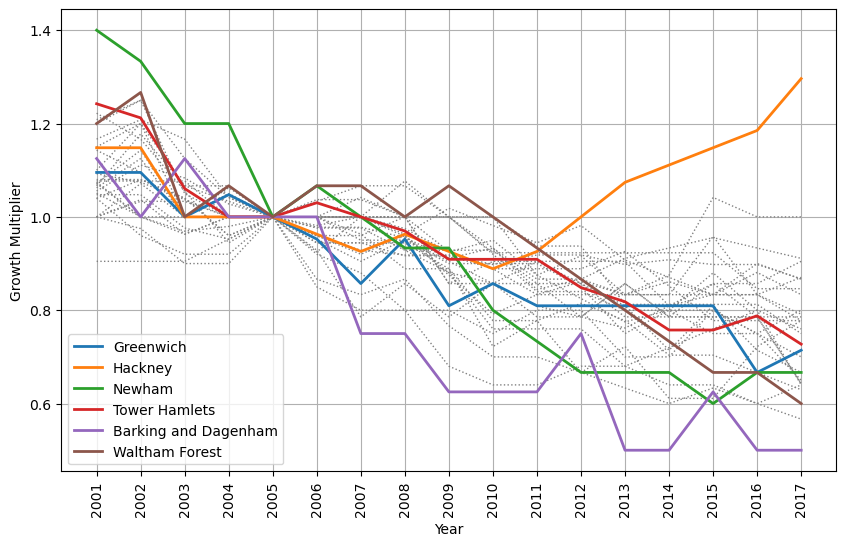

In [13]:
plot_all_boroughs(multipliers_2005)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/pubs_units_multiplier_2005')
plt.show()

## Changes (baseline 2011)

In [14]:
multipliers_2011 = pubs_units[years].div(pubs_units["2011"], axis=0)
multipliers_2011 = pd.concat([pubs_units.iloc[:, :2], multipliers_2011], axis=1)
multipliers_2011.head()
hackney_multipliers_2011 = multipliers_2011[multipliers_2011['Area name'] == 'Hackney']
hackney_multipliers_2011.head()

,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
12,E09000012,Hackney,1.24,1.24,1.08,1.08,1.08,1.04,1.0,1.04,1.0,0.96,1.0,1.08,1.16,1.2,1.24,1.28,1.4


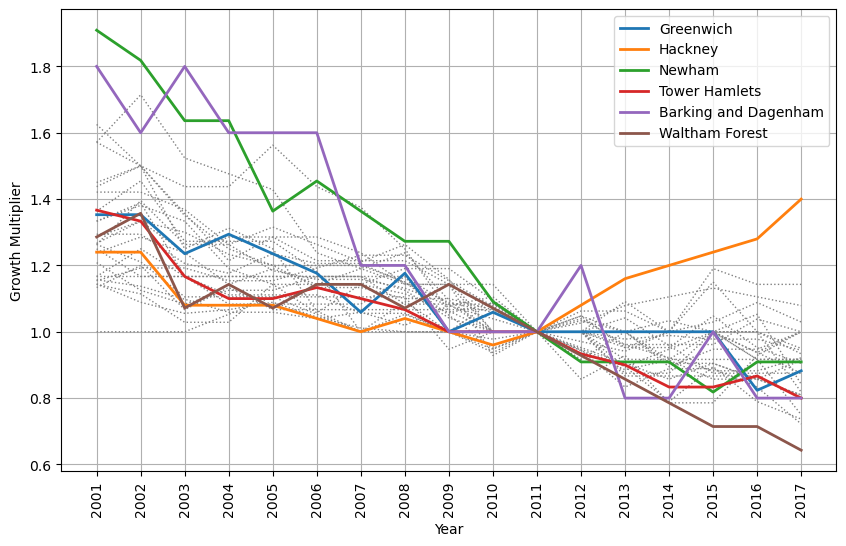

In [15]:
plot_all_boroughs(multipliers_2011)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/pubs_units_multiplier_2011')
plt.show()

# Number of pub employees by borough

In [16]:
pubs_employees = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Pubs employment", skiprows=4, names=columns)
pubs_employees_boroughs = pubs_employees[pubs_employees['Area name'].isin(growth_boroughs)]

pubs_employees_boroughs.head()
hackney_pubs_employees = pubs_employees_boroughs[pubs_employees_boroughs['Area name'] == 'Hackney']

## Aboslute value of growth boroughs

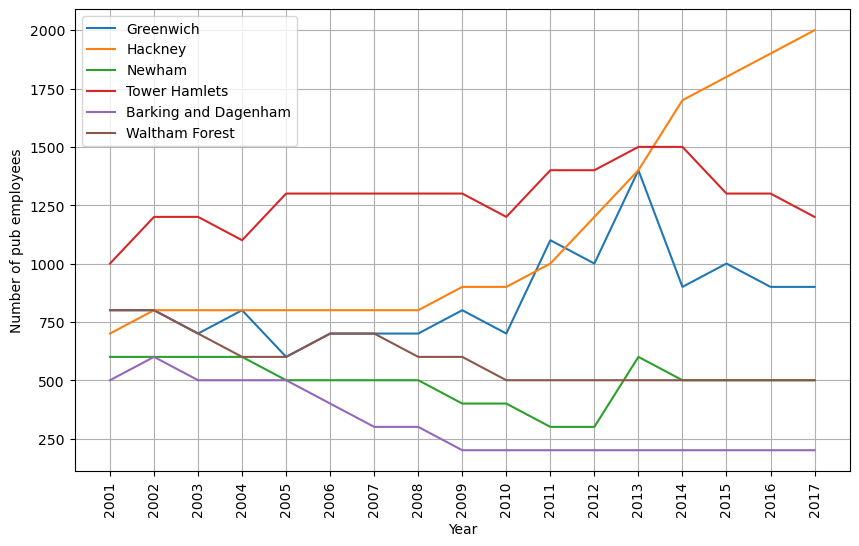

In [17]:
plot_boroughs(pubs_employees_boroughs)
plt.ylabel('Number of pub employees')

plt.savefig(f'{PLOTS_DIR}/pubs_employees_values.png', bbox_inches='tight')
plt.show()

## Changes (baseline 2005)

In [18]:
multipliers_emp_2005 = pubs_employees[years].div(pubs_employees["2005"], axis=0)
multipliers_emp_2005 = pd.concat([pubs_employees.iloc[:, :2], multipliers_emp_2005], axis=1)
multipliers_emp_2005.head()
hackney_multipliers_emp_2005 = multipliers_emp_2005[multipliers_emp_2005['Area name'] == 'Hackney']

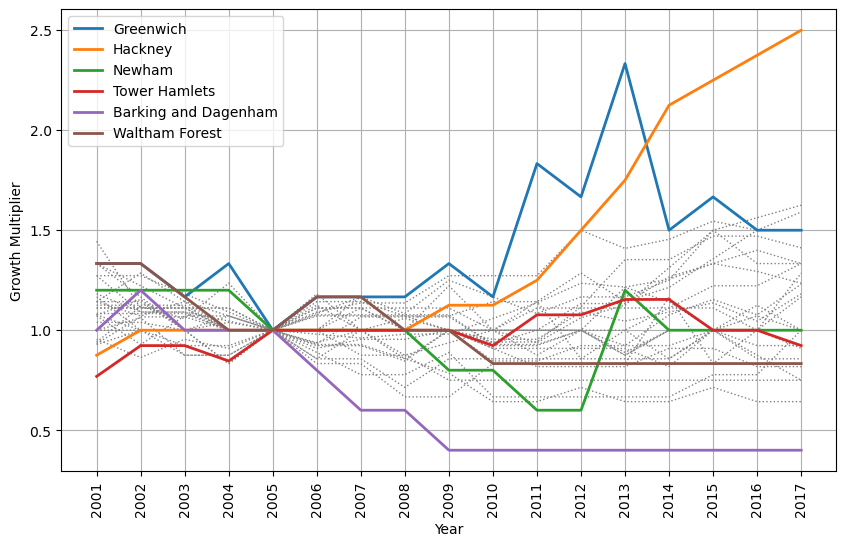

In [19]:
plot_all_boroughs(multipliers_emp_2005)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/pubs_employees_multiplier_2005')
plt.show()

## Changes (baseline 2011)

In [20]:
multipliers_emp_2011 = pubs_employees[years].div(pubs_employees["2011"], axis=0)
multipliers_emp_2011 = pd.concat([pubs_employees.iloc[:, :2], multipliers_emp_2011], axis=1)
multipliers_emp_2011.head()
hackney_multipliers_emp_2011 = multipliers_emp_2011[multipliers_emp_2011['Area name'] == 'Hackney']
newham_multipliers_emp_2011 = multipliers_emp_2011[multipliers_emp_2011['Area name'] == 'Newham']

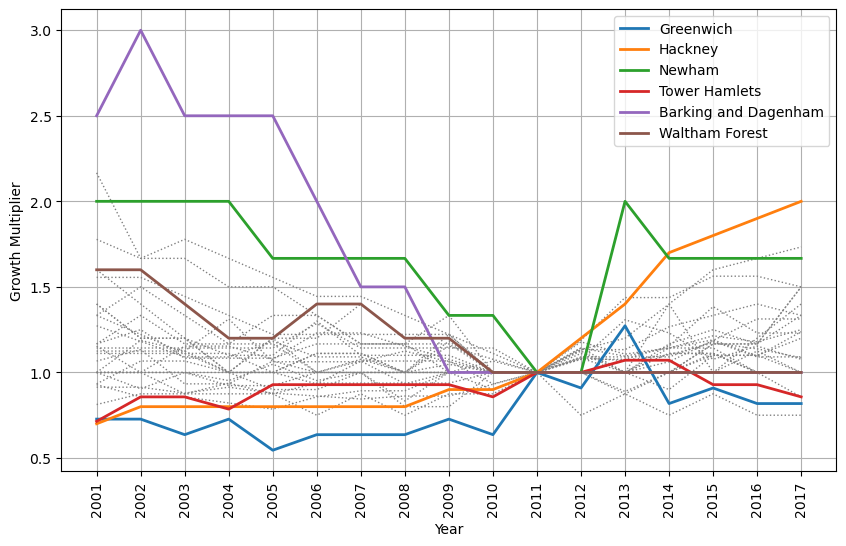

In [21]:
plot_all_boroughs(multipliers_emp_2011)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/pubs_employees_multiplier_2011')
plt.show()

# Number of small public houses and bars by borough


In [22]:
small_pubs = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Small Pubs units", skiprows=4, names=columns)
small_pubs_boroughs = small_pubs[small_pubs['Area name'].isin(growth_boroughs)]

small_pubs_boroughs.head()
hackney_small_pubs = small_pubs_boroughs[small_pubs_boroughs['Area name'] == 'Hackney']

## Absolute value of growth boroughs

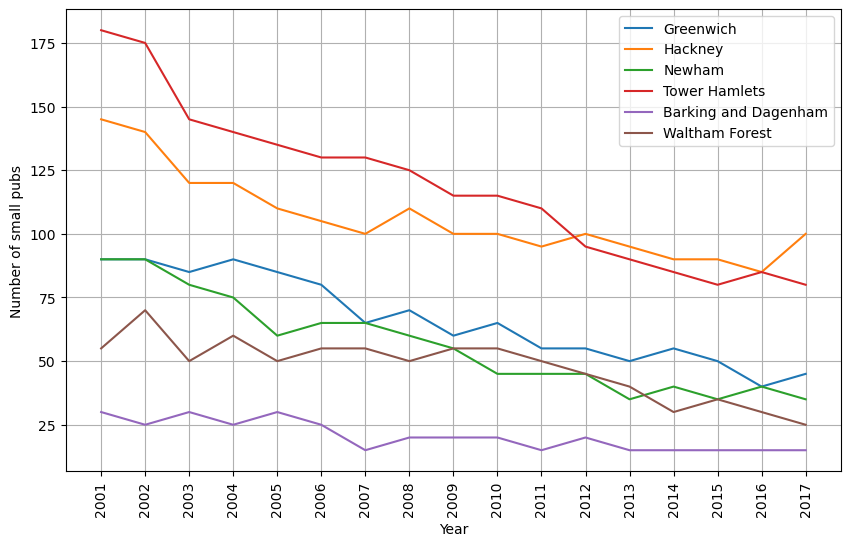

In [23]:
plot_boroughs(small_pubs_boroughs)
plt.ylabel('Number of small pubs')

plt.savefig(f'{PLOTS_DIR}/small_pubs_units_values.png', bbox_inches='tight')
plt.show()

## Changes (baseline 2005)

In [24]:
multipliers_sm_2005 = small_pubs[years].div(small_pubs["2005"], axis=0)
multipliers_sm_2005 = pd.concat([small_pubs.iloc[:, :2], multipliers_sm_2005], axis=1)
multipliers_sm_2005.head()
hackney_multipliers_sm_2005 = multipliers_sm_2005[multipliers_sm_2005['Area name'] == 'Hackney']

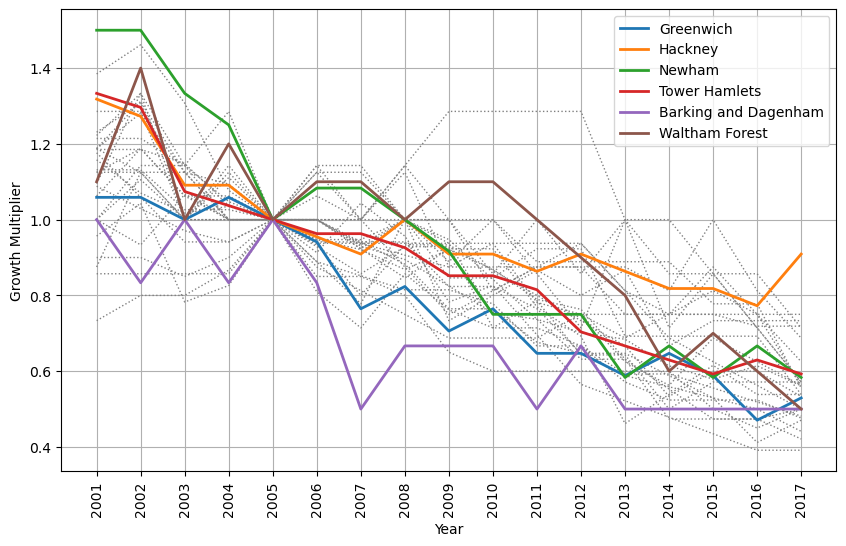

In [25]:
plot_all_boroughs(multipliers_sm_2005)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/small_pubs_units_multiplier_2005')
plt.show()

## Changes (baseline 2011)

In [26]:
multipliers_sm_2011 = small_pubs[years].div(small_pubs["2011"], axis=0)
multipliers_sm_2011 = pd.concat([small_pubs.iloc[:, :2], multipliers_sm_2011], axis=1)
multipliers_sm_2011.head()
hackney_multipliers_sm_2011 = multipliers_sm_2011[multipliers_sm_2011['Area name'] == 'Hackney']

In [27]:
multipliers_sm_2011


,Area code,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E12000007,London,1.461207,1.493534,1.344828,1.327586,1.299569,1.252155,1.204741,1.185345,1.101293,1.051724,1.0,0.954741,0.872845,0.808190,0.801724,0.762931,0.724138
1,E09000001,City of London,1.375000,1.500000,1.125000,1.187500,1.437500,1.312500,1.500000,1.375000,1.125000,1.187500,1.0,0.812500,0.750000,0.687500,0.625000,0.562500,0.562500
2,E09000002,Barking and Dagenham,2.000000,1.666667,2.000000,1.666667,2.000000,1.666667,1.000000,1.333333,1.333333,1.333333,1.0,1.333333,1.000000,1.000000,1.000000,1.000000,1.000000
3,E09000003,Barnet,1.583333,1.500000,1.500000,1.333333,1.333333,1.333333,1.333333,1.333333,1.250000,1.000000,1.0,1.000000,0.916667,1.000000,1.000000,1.000000,0.750000
4,E09000004,Bexley,0.846154,0.923077,0.923077,1.000000,1.153846,1.153846,1.076923,1.153846,0.846154,0.923077,1.0,0.923077,1.000000,0.769231,0.846154,0.846154,0.846154
5,E09000005,Brent,1.200000,1.266667,1.133333,1.066667,1.066667,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.866667,0.800000,0.866667,0.800000,0.666667
6,E09000006,Bromley,1.250000,1.166667,1.333333,1.250000,1.250000,1.166667,1.000000,1.166667,1.166667,1.083333,1.0,0.916667,0.833333,0.666667,0.750000,0.750000,0.666667
7,E09000007,Camden,1.433333,1.433333,1.300000,1.300000,1.266667,1.200000,1.166667,1.100000,1.166667,1.100000,1.0,0.966667,0.800000,0.700000,0.600000,0.600000,0.633333
8,E09000008,Croydon,1.533333,1.866667,1.600000,1.466667,1.400000,1.133333,1.000000,1.200000,1.066667,1.000000,1.0,0.933333,0.800000,0.733333,0.733333,0.733333,0.666667
9,E09000009,Ealing,1.357143,1.500000,1.285714,1.142857,1.142857,1.214286,1.142857,1.000000,0.857143,0.928571,1.0,1.000000,1.000000,0.928571,1.142857,0.928571,0.785714


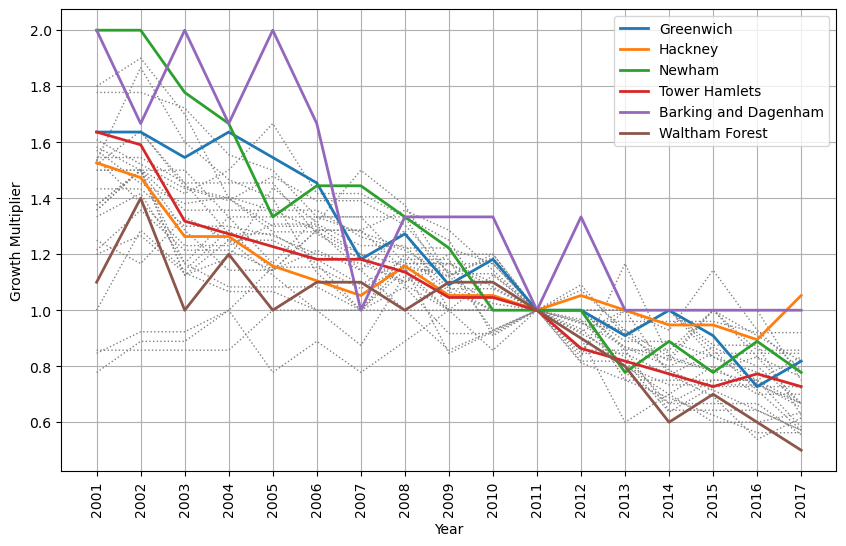

In [28]:
plot_all_boroughs(multipliers_sm_2011)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/small_pubs_units_multiplier_2011')
plt.show()

# Number of employees of small pubs by borough

In [29]:
small_pubs_employees = pd.read_excel("../data/pubs-borough-msoa.xls", sheet_name="Small Pubs employment", skiprows=4, names=columns)

small_pubs_employees.dropna(inplace=True)
small_pubs_employees = small_pubs_employees[~small_pubs_employees['Area name'].isin(['Barking and Dagenham','Merton']) ]

small_pubs_employees_boroughs = small_pubs_employees[small_pubs_employees['Area name'].isin(growth_boroughs)]
small_pubs_employees_boroughs.head()
hackney_small_pubs_employees = small_pubs_employees_boroughs[small_pubs_employees_boroughs['Area name'] == 'Hackney']

## Absolute value of growth boroughs

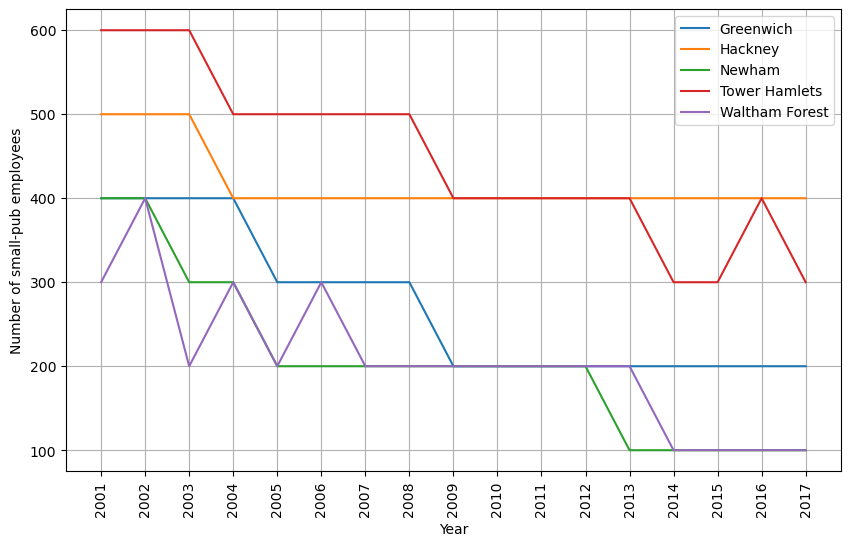

In [30]:
plot_boroughs(small_pubs_employees_boroughs)
plt.ylabel('Number of small-pub employees')

plt.savefig(f'{PLOTS_DIR}/small_pubs_employees_values.png', bbox_inches='tight')
plt.show()


## Changes (baseline 2005)

In [31]:
multipliers_sm_emp_2005 = small_pubs_employees[years].div(small_pubs_employees["2005"], axis=0)
multipliers_sm_emp_2005 = pd.concat([small_pubs_employees.iloc[:, :2], multipliers_sm_emp_2005], axis=1)
multipliers_sm_emp_2005.head()
hackney_multipliers_sm_emp_2005 = multipliers_sm_emp_2005[multipliers_sm_emp_2005['Area name'] == 'Hackney']

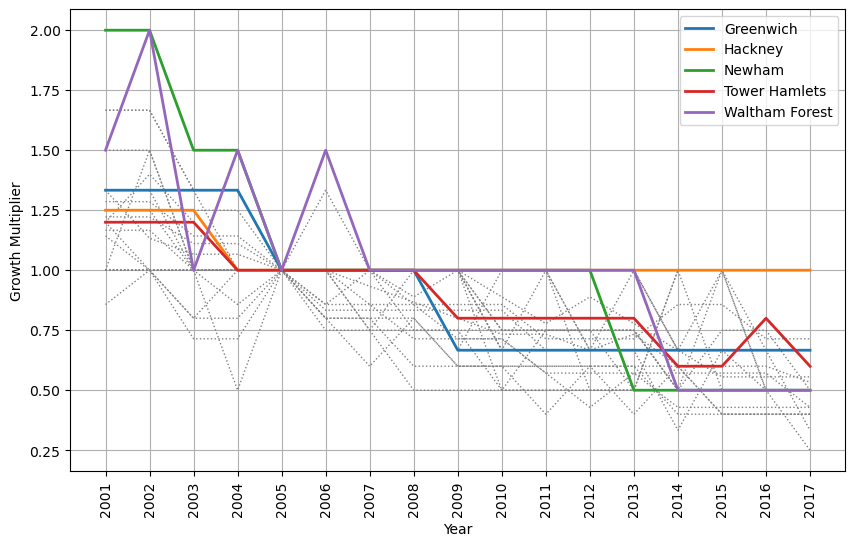

In [32]:
plot_all_boroughs(multipliers_sm_emp_2005)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/small_pubs_employees_multiplier_2005')
plt.show()

## Changes (baseline 2011)

In [33]:
multipliers_sm_emp_2011 = small_pubs_employees[years].div(small_pubs_employees["2011"], axis=0)
multipliers_sm_emp_2011 = pd.concat([small_pubs_employees.iloc[:, :2], multipliers_sm_emp_2011], axis=1)
multipliers_sm_emp_2011.head()
hackney_multipliers_sm_emp_2011 = multipliers_sm_emp_2011[multipliers_sm_emp_2011['Area name'] == 'Hackney']

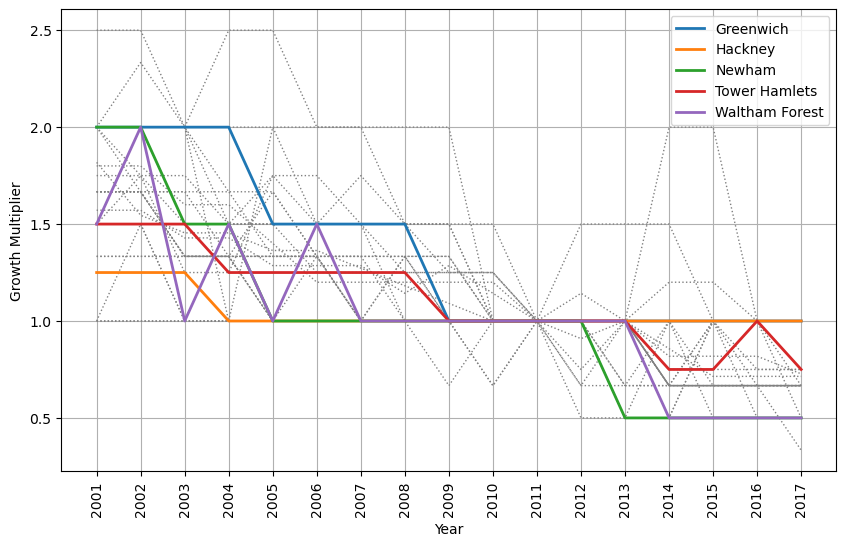

In [34]:
plot_all_boroughs(multipliers_sm_emp_2011)
plt.ylabel(GROWTH_MULTIPLIER)

plt.savefig(f'{PLOTS_DIR}/small_pubs_employees_multiplier_2011')
plt.show()

In [35]:
# Hacney specific
hackney_pubs_units = pubs_units_boroughs[pubs_units_boroughs['Area name'] == 'Hackney']
hackney_multipliers_2005 = multipliers_2005[multipliers_2005['Area name'] == 'Hackney']
hackney_multipliers_2011 = multipliers_2011[multipliers_2011['Area name'] == 'Hackney']
hackney_pubs_units = pubs_units_boroughs[pubs_units_boroughs['Area name'] == 'Hackney']
hackney_multipliers_emp_2005 = multipliers_emp_2005[multipliers_emp_2005['Area name'] == 'Hackney']
hackney_multipliers_emp_2011 = multipliers_emp_2011[multipliers_emp_2011['Area name'] == 'Hackney']
hackney_small_pubs = small_pubs_boroughs[small_pubs_boroughs['Area name'] == 'Hackney']
hackney_multipliers_sm_2005 = multipliers_sm_2005[multipliers_sm_2005['Area name'] == 'Hackney']
hackney_multipliers_sm_2011 = multipliers_sm_2011[multipliers_sm_2011['Area name'] == 'Hackney']
hackney_small_pubs_employees = small_pubs_employees_boroughs[small_pubs_employees_boroughs['Area name'] == 'Hackney']
hackney_multipliers_sm_emp_2005 = multipliers_sm_emp_2005[multipliers_sm_emp_2005['Area name'] == 'Hackney']
hackney_multipliers_sm_emp_2011 = multipliers_sm_emp_2011[multipliers_sm_emp_2011['Area name'] == 'Hackney']



In [36]:
gdp_per_capita = pd.read_excel(
    "../data/regionalgrossdomesticproductgdpcityregions.xlsx", sheet_name="Table 7")
# delete area type
gdp_per_capita.drop('Area type', axis=1, inplace=True)
# rename geo code to area code
gdp_per_capita.rename(columns={'Geo Code': 'Area code'}, inplace=True)


In [45]:
hackney_gdp_per_capita = gdp_per_capita[gdp_per_capita['Area name'] == 'Hackney']
hackney_gdp_per_capita.head()


,Area code,Area name,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
12,E09000012,Hackney,14461,15142,15997,16500,16869,17838,18543,19684,...,22750,23077,25215,25908,27154,28868,31750,36535,37284,44006


ValueError: x and y must have same first dimension, but have shapes (18224,) and (24,)

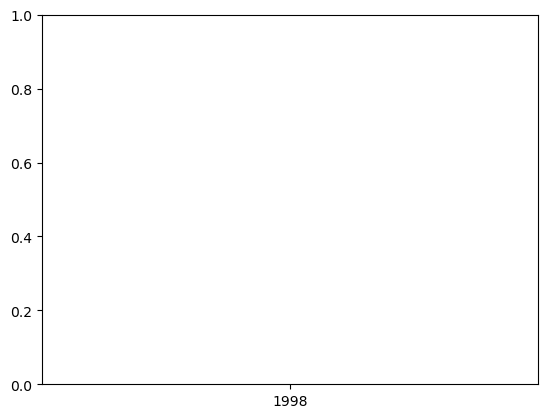

In [49]:
#plot hacnkey_gdp_per_capita
year_hackney = [str(y) for y in range(1998,20222)]
plt.plot(year_hackney, hackney_gdp_per_capita.iloc[0, 2:].values)

In [ ]:
plot_boroughs_earlier(gdp_per_capita)


NameError: name 'plot_boroughs_earlier' is not defined